In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import data
df = pd.read_csv('../../long_short_local/raw_data/cleaned_data.csv')
df.head()

,Date,ALB_ZBRA,NRG_CPRT,DE_BXP,NRG_STE,NRG_XRAY,SO_NLOK,PEG_O
0,2020-08-31,0.311845,0.310544,2.548054,0.203834,0.727693,2.136432,0.882281
1,2020-09-01,0.332974,0.306303,2.687319,0.203522,0.722940,2.094566,0.855546
2,2020-09-02,0.332368,0.315056,2.629334,0.204743,0.734758,2.125291,0.872526
3,2020-09-03,0.339772,0.310060,2.534974,0.201707,0.728923,2.210971,0.848504
4,2020-09-04,0.356920,0.300754,2.536138,0.199887,0.707646,2.152835,0.854765


In [3]:
df.tail(2)

,Date,ALB_ZBRA,NRG_CPRT,DE_BXP,NRG_STE,NRG_XRAY,SO_NLOK,PEG_O
495,2022-08-18,0.816374,0.333768,4.22249,0.204492,1.196920,3.371537,0.950678
496,2022-08-19,0.822204,0.334919,4.28095,0.204631,1.200391,3.405268,0.951858


In [4]:
df.describe()

,ALB_ZBRA,NRG_CPRT,DE_BXP,NRG_STE,NRG_XRAY,SO_NLOK,PEG_O
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,0.439148,0.296925,3.242148,0.178814,0.728099,2.664304,0.960830
std,0.134129,0.038166,0.309264,0.017806,0.170586,0.296301,0.047787
min,0.279760,0.219809,2.513787,0.147486,0.464028,2.094566,0.829956
25%,0.336085,0.270483,3.054503,0.164950,0.624090,2.436779,0.928549
50%,0.403014,0.290112,3.224409,0.175372,0.691772,2.649792,0.960627
75%,0.464571,0.316606,3.435012,0.189553,0.742545,2.861494,0.994654
max,0.822204,0.425462,4.280950,0.231046,1.230987,3.405268,1.094158


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      497 non-null    object 
 1   ALB_ZBRA  497 non-null    float64
 2   NRG_CPRT  497 non-null    float64
 3   DE_BXP    497 non-null    float64
 4   NRG_STE   497 non-null    float64
 5   NRG_XRAY  497 non-null    float64
 6   SO_NLOK   497 non-null    float64
 7   PEG_O     497 non-null    float64
dtypes: float64(7), object(1)
memory usage: 31.2+ KB


## Implemenation refactored

In [57]:
# R
# split into train/test
one_ratio_df = pd.DataFrame(df[['Date', 'ALB_ZBRA']])#[ratio]
train_data, validation_data, length_train, length_validation = split_train_val(one_ratio_df)
# call train_split
dataset_train_scaled = train_split(train_data)
# create X_train, y_train
X_train, X_val, y_train, y_val, time_step = create_x_y_train(dataset_train_scaled, length_train)
# create X_test, y_test
X_test, y_test = create_x_y_test(validation_data, length_validation, time_step)

In [ ]:
# we check first chosen ratios first (here: ALB_ZBRA)
df_small=df.iloc[:,[0,2]]
df_small.head()

In [ ]:
df_small.shape

In [ ]:
df_small.info()

## Splitting Data in Train and Validation

In [52]:
# R
def split_train_val(df):
    length_data = len(df)    
    split_ratio = 0.7           # %70 train + %30 validation
    length_train = round(length_data * split_ratio)  
    length_validation = length_data - length_train
    #print("Data length :", length_data)
    #print("Train data length:", length_train)
    #print("Validation data lenth:", length_validation)
    
    train_data = df[:length_train].iloc[:,:2] 
    train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object

    validation_data = df[length_train:].iloc[:,:2]
    validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
    
    return train_data, validation_data, length_train, length_validation

In [ ]:
length_data = len(df_small)    
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length:", length_train)
print("Validation data lenth:", length_validation)

In [ ]:
# train_data
train_data = df_small[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

In [ ]:
# validation_data
validation_data = df_small[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

## Creating Train Dataset from Train split

In [8]:
# R
# create dataset from train split
def train_split(train_data):
    dataset_train = train_data.iloc[:, 1].values
    # Change 1d array to 2d array
    # Changing shape from (1692,) to (1692,1)
    dataset_train = np.reshape(dataset_train, (-1,1))
    #dataset_train.shape
    dataset_train_scaled = dataset_train
    
    return dataset_train_scaled

In [ ]:
dataset_train = train_data.iloc[:, 1].values
dataset_train.shape

In [ ]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

## Normalization / Feature Scaling not needed/recommended

In [ ]:
dataset_train_scaled = dataset_train

## Creating X_train and y_train from Train data 

We have train data composed of ratios over days

So, it has 1184 ratios corresponding 1184 days

My aim is to predict the ratio (closing) of the next day.

I can use a time step of 2 days.

I will pick first 2 ratios (day 0 to 2), 1st 2 ratio will be in 
X_train data

Then predict the ratio of 3rd day; and 3rd ratio will be in y_train data

Again, i will pick ratios from 1 to 3, those will be in X_train data

Then predict the next days ratio, 4th ratio will be in y_train data



In [50]:
def create_x_y_train(df, length_train):
    X_train = []
    y_train = []

    time_step = 20 #change that?

    for i in range(time_step, length_train):
        X_train.append(dataset_train_scaled[i-time_step:i,0:1])
        y_train.append(dataset_train_scaled[i,0:1])

    # convert list to array
    X_train, y_train = np.array(X_train), np.array(y_train)
    
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
    y_train = np.reshape(y_train, (y_train.shape[0],1))
    
    X_train = X_train[:int(X_train.shape[0]*0.95)]
    X_val = X_train[int(X_train.shape[0]*0.95):]
    y_train = y_train[:int(y_train.shape[0]*0.95)]
    y_val = y_train[int(y_train.shape[0]*0.95):]
    
    return X_train, X_val, y_train, y_val, time_step

In [ ]:
X_train = []
y_train = []

time_step = 20 #change that?

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0:1])
    y_train.append(dataset_train_scaled[i,0:1])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

In [ ]:
pd.Series([len(X) for X in X_train]).describe()

In [ ]:
dataset_train_scaled[i-time_step:i]

In [ ]:
dataset_train_scaled[i,0]

In [ ]:
print("Shape of X_train before reshape:",X_train.shape)
print("Shape of y_train before reshape:",y_train.shape)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

In [ ]:
X_train[0]

In [ ]:
X_train = X_train[:int(X_train.shape[0]*0.95)]
X_val = X_train[int(X_train.shape[0]*0.95):]
y_train = y_train[:int(y_train.shape[0]*0.95)]
y_val = y_train[int(y_train.shape[0]*0.95):]

Check the first item in y_train
It is the ratio of 2nd day (timestep 2)

In [ ]:
y_train[0]

## Creating Test Dataset from Validation Data

In [56]:
# R
#Converting array and scaling
def create_x_y_test(validation_data, length_validation, time_step):
    dataset_validation = validation_data.iloc[:,1].values  # getting "Ratio" column and converting to array
    dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
    #scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling  values to between 0 and 1
    scaled_dataset_validation = dataset_validation
    
    X_test = []
    y_test = []

    for i in range(time_step, length_validation):
        X_test.append(scaled_dataset_validation[i-time_step:i,0])
        y_test.append(scaled_dataset_validation[i,0])
        
    # Converting to array
    X_test, y_test = np.array(X_test), np.array(y_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
    y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array
    
    return X_test, y_test

In [ ]:
#Converting array and scaling
dataset_validation = validation_data.iloc[:,1].values  # getting "Ratio" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
#scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling  values to between 0 and 1
scaled_dataset_validation = dataset_validation 

print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

In [ ]:
#Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [ ]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

In [ ]:
#reshape
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [ ]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

## Creating LSTM Model

In [ ]:
y_train.min()

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [60]:
from keras.layers import LSTM
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense


es = EarlyStopping(patience=20, restore_best_weights=True)
model_lstm = Sequential()

model_lstm.add(LSTM(20,return_sequences=False,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))

model_lstm.compile(loss = "mape", optimizer = "rmsprop", metrics = ["mae", "mape"])
history2 = model_lstm.fit(X_train, y_train, epochs = 400, batch_size = 64,validation_data = (X_val, y_val),callbacks=[es])

2022-09-06 21:19:21.381430: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-06 21:19:21.678394: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/400
5/5 [==============================] - 11s 108ms/step - loss: 100.6848 - mae: 0.3742 - mape: 100.6848 - val_loss: 50.3967 - val_mae: 0.2102 - val_mape: 50.3967
Epoch 2/400
5/5 [==============================] - 0s 7ms/step - loss: 32.4053 - mae: 0.1230 - mape: 32.4053 - val_loss: 8.9192 - val_mae: 0.0379 - val_mape: 8.9192
Epoch 3/400
5/5 [==============================] - 0s 7ms/step - loss: 8.4761 - mae: 0.0321 - mape: 8.4761 - val_loss: 9.9211 - val_mae: 0.0420 - val_mape: 9.9211
Epoch 4/400
5/5 [==============================] - 0s 7ms/step - loss: 7.8852 - mae: 0.0301 - mape: 7.8852 - val_loss: 5.1883 - val_mae: 0.0223 - val_mape: 5.1883
Epoch 5/400
5/5 [==============================] - 0s 7ms/step - loss: 8.2310 - mae: 0.0307 - mape: 8.2310 - val_loss: 3.2017 - val_mae: 0.0130 - val_mape: 3.2017
Epoch 6/400
5/5 [==============================] - 0s 7ms/step - loss: 8.5882 - mae: 0.0313 - mape: 8.5882 - val_loss: 3.4113 - val_mae: 0.0144 - val_mape: 3.4113
Epoch 7/400

## Evaluating LSTM Model

In [61]:
model_lstm.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 7.2049 - mae: 0.0469 - mape: 7.2049


[7.204861164093018, 0.04687449708580971, 7.204861164093018]

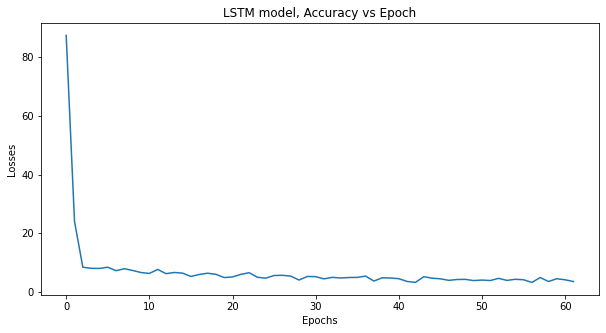

In [62]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

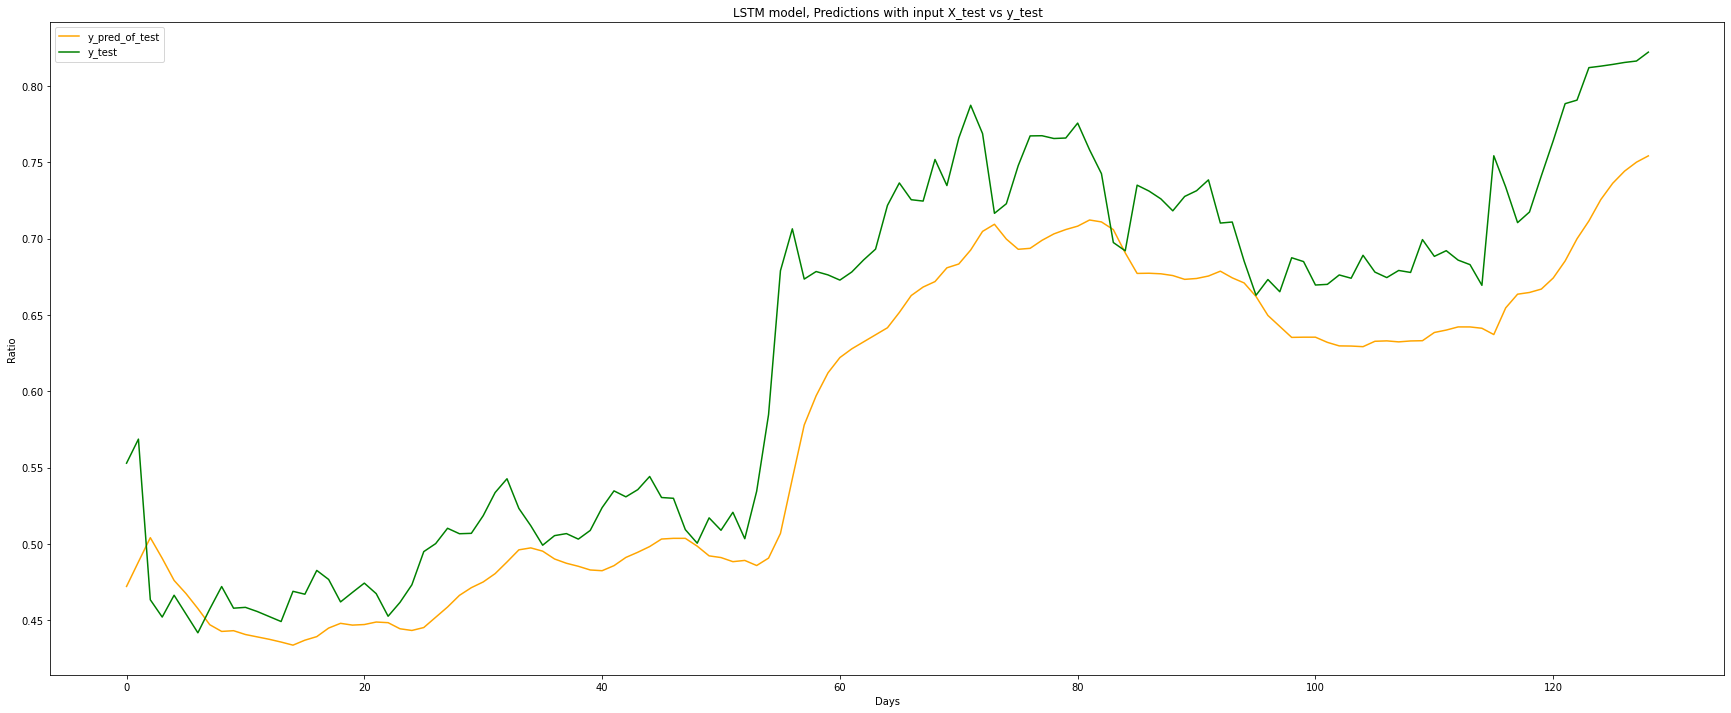

In [63]:
plt.subplots(figsize =(30,12))
plt.plot(model_lstm.predict(X_test), label = "y_pred_of_test", c = "orange" )
plt.plot(y_test, label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Ratio")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

## Future ratio prediction

In [64]:
#last day in our data?
df.iloc[-1]

Date        2022-08-19
ALB_ZBRA      0.822204
NRG_CPRT      0.334919
DE_BXP         4.28095
NRG_STE       0.204631
NRG_XRAY      1.200391
SO_NLOK       3.405268
PEG_O         0.951858
Name: 496, dtype: object

### We can predict the ratio for the day after 2022-08-23--> for 2022-08-24.
We will use last ratios as input of our model for this prediction.

In [65]:
X_input = df.iloc[-time_step:].ALB_ZBRA.values             # getting last rows and converting to array
X_input = (X_input.reshape(-1,1))     # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,time_step,1))                    # reshaping: converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 20, 1)


array([[[0.69941916],
        [0.68844238],
        [0.69216225],
        [0.6859797 ],
        [0.6830216 ],
        [0.66947524],
        [0.75433006],
        [0.73386229],
        [0.71053908],
        [0.71748567],
        [0.74122061],
        [0.76420431],
        [0.78845742],
        [0.79077385],
        [0.81204942],
        [0.81302763],
        [0.8141544 ],
        [0.8154501 ],
        [0.81637364],
        [0.82220391]]])

In [66]:
LSTM_prediction = model_lstm.predict(X_input)
print("LSTM, prediction for 2022-08-24:", LSTM_prediction[0,0])

LSTM, prediction for 2022-08-24: 0.7583173
